In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from matplotlib.axes import Axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from datetime import datetime

## Datasets

In [4]:
# Load weather data
weather_data = pd.read_csv('../data/weather.csv')
weather_data

,year,month,tokyo_mean,tokyo_high,tokyo_low,sapporo_mean,sapporo_high,sapporo_low,naha_mean,naha_high,naha_low
0,1994,1,5.5,16.8,-1.3,-4.7,2.6,-14.0,17.3,24.3,12.0
1,1994,2,6.6,16.0,-2.3,-1.3,7.4,-9.3,17.1,23.6,10.3
2,1994,3,8.1,18.7,2.3,-0.5,10.8,-9.0,17.1,24.5,11.2
3,1994,4,15.8,24.4,4.3,7.0,20.2,-1.2,22.4,28.3,16.6
4,1994,5,19.5,29.3,10.8,13.5,29.2,4.1,23.4,29.2,16.2
...,...,...,...,...,...,...,...,...,...,...,...
366,2024,7,28.7,37.3,22.1,23.3,34.7,13.9,30.5,36.0,25.6
367,2024,8,29.0,35.9,23.3,24.6,34.1,18.2,30.2,34.3,25.3
368,2024,9,26.6,35.1,17.7,19.9,31.5,10.0,28.8,33.6,23.9
369,2024,10,20.6,31.9,11.5,13.8,26.3,2.8,27.6,32.1,22.5


In [22]:
# Get temporal data
weather_data.index = weather_data.apply(
    lambda x: datetime(year=int(x['year']), month=int(x["month"]), day=1),
    axis=1)

In [5]:
# Get weather data only for 2023
weather_data_2023 = weather_data[weather_data['year'] == 2023]
weather_data_2023

,year,month,tokyo_mean,tokyo_high,tokyo_low,sapporo_mean,sapporo_high,sapporo_low,naha_mean,naha_high,naha_low
348,2023,1,5.7,14.2,-3.4,-4.4,7.6,-13.2,17.5,25.4,8.4
349,2023,2,7.3,19.4,-0.7,-2.7,11.2,-10.5,19.0,25.6,14.2
350,2023,3,12.9,25.0,3.6,4.9,19.1,-5.4,20.0,27.3,12.3
351,2023,4,16.3,26.8,6.6,9.2,21.1,1.5,22.5,28.7,15.2
352,2023,5,19.0,32.2,10.1,13.8,28.9,4.7,24.3,30.0,18.9
353,2023,6,23.2,33.8,15.3,19.3,31.2,8.2,27.2,32.8,23.6
354,2023,7,28.7,37.7,20.7,23.8,34.4,17.0,29.6,34.3,25.4
355,2023,8,29.2,36.7,22.2,26.7,36.3,19.7,28.6,34.0,24.6
356,2023,9,26.7,34.9,18.5,21.5,29.8,12.0,28.7,33.1,24.6
357,2023,10,18.9,29.9,11.4,13.3,24.5,3.1,26.0,32.3,20.7


In [6]:
# Load car data
car_data = pd.read_csv('../data/mtcars.csv')
car_data

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Plots

### Timeseries Line plot with shading, Subplots

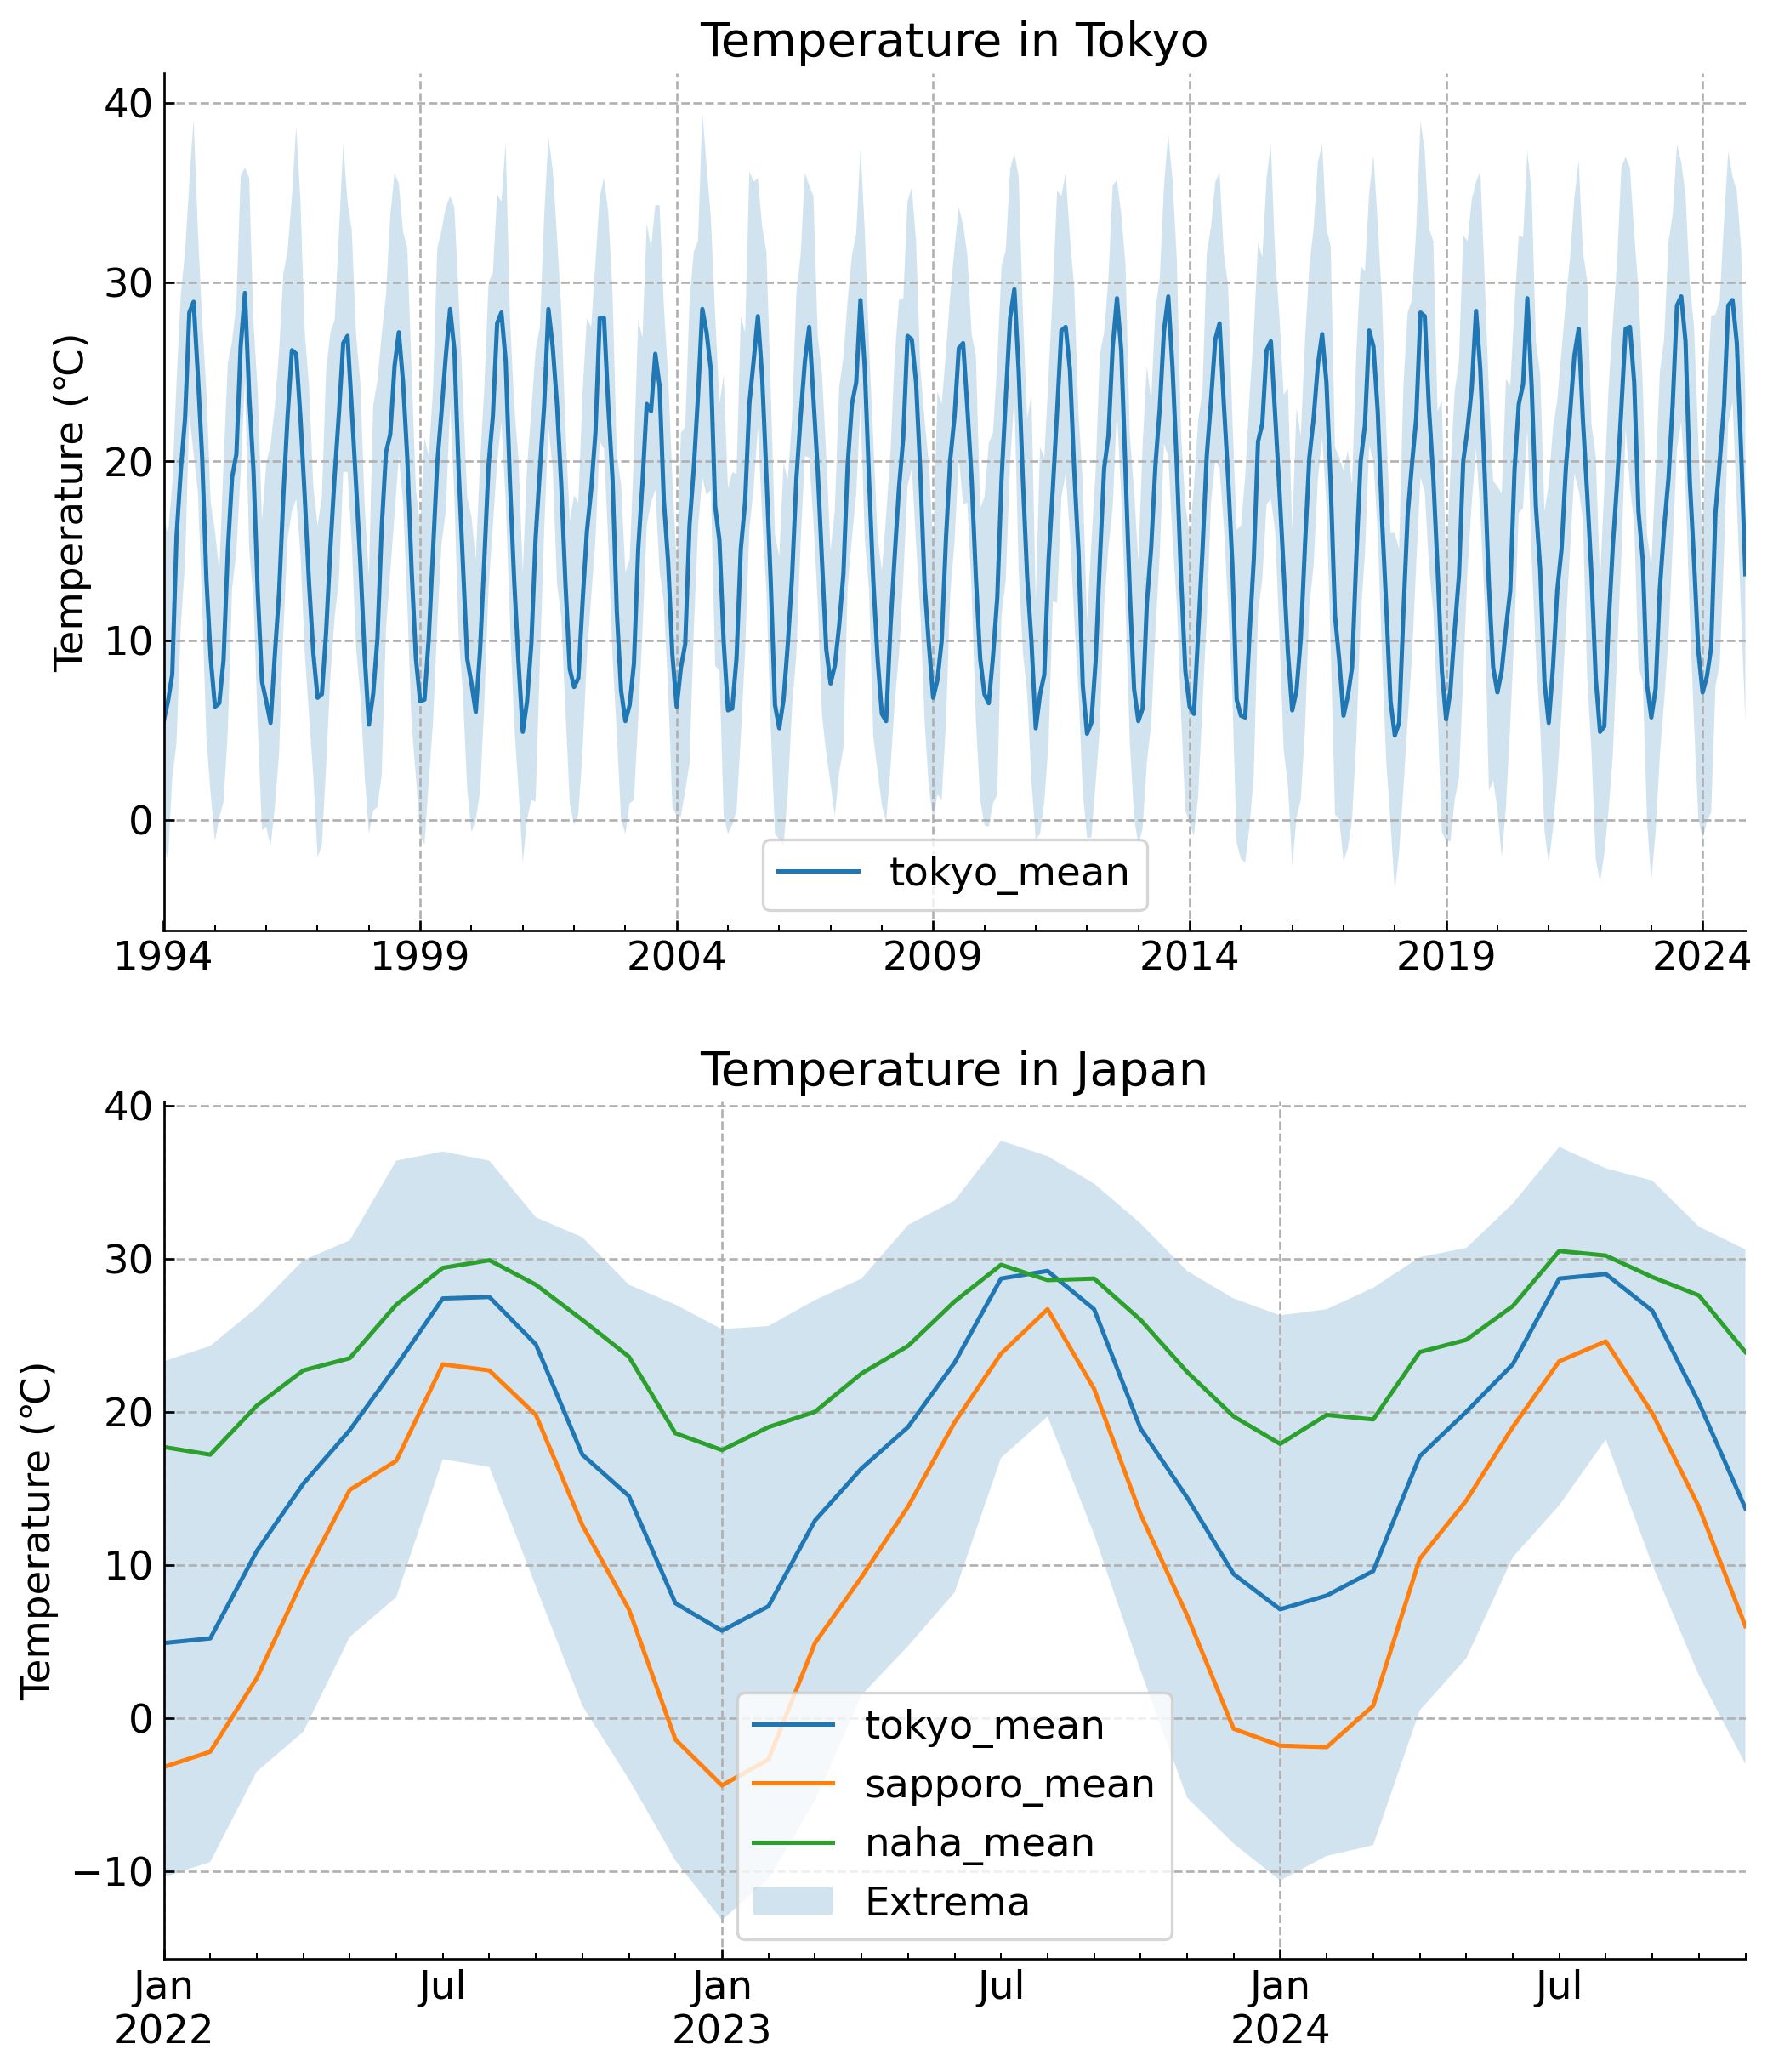

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('example.mplstyle')
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Create the plot using pandas
weather_data.plot(
    y='tokyo_mean',
    kind='line',
    ax=axes[0],
    ylabel='Temperature (℃)',
    title="Temperature in Tokyo",
    grid=True,
)

# Extrema shade
axes[0].fill_between(
    weather_data.index,
    weather_data['tokyo_low'],
    weather_data['tokyo_high'],
    alpha=0.2,  # Transparency
)


zoomed_weather_data = weather_data.loc["2022":"2024"]

# Create the plot using pandas
zoomed_weather_data.plot(
    y=['tokyo_mean', 'sapporo_mean', 'naha_mean'],
    kind='line',
    ax=axes[1],
    ylabel='Temperature (℃)',
    title="Temperature in Japan",
    grid=True
)

# Extrema shade
axes[1].fill_between(
    zoomed_weather_data.index,
    zoomed_weather_data.apply(
        lambda x: min(
            [x['tokyo_low'], x['sapporo_low'], x['naha_low']]),
        axis=1),
    zoomed_weather_data.apply(
        lambda x: max(
            [x['tokyo_high'], x['sapporo_high'], x['naha_high']]),
        axis=1),
    alpha=0.2,  # Transparency
    label='Extrema',
)

plt.legend()
# Save and show
plt.savefig('figs/monthly_tokyo_2023.png')
plt.savefig('figs/monthly_tokyo_2023.pdf')
plt.show()

### Box plot

In [73]:
# Rearrange data

# Make a hierarchical columns
import itertools

# List of cities and stats
cities = ['tokyo', 'sapporo', 'naha']
stats = ['mean', 'high', 'low']

# Create column tuples using cartesian product
columns = list(itertools.product(cities, stats))

reordered_weather_data = weather_data.drop(columns=["year", "month"])
reordered_weather_data.columns = pd.MultiIndex.from_tuples(columns, names=[
                                                           'city', 'stat'])

/tmp/ipykernel_38283/370591791.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  reordered_weather_data.groupby(


<Axes: >

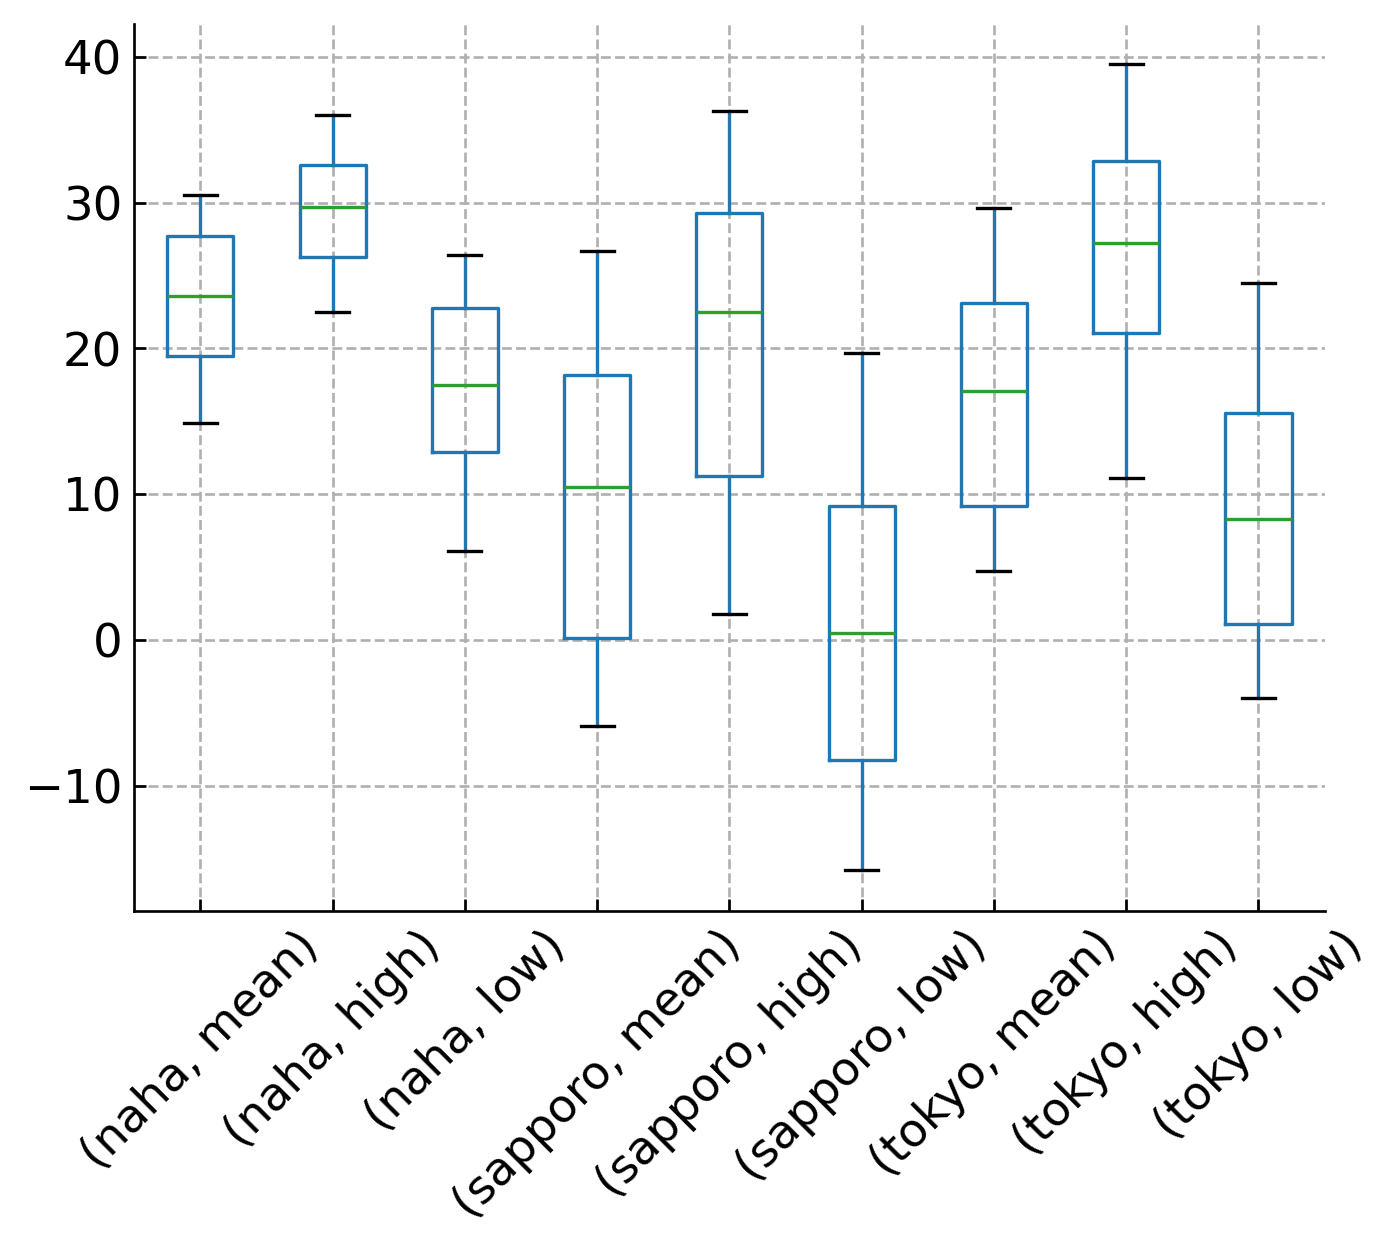

In [74]:
# Make a hierarchical columns
reordered_weather_data.groupby(
    level="city", axis=1).boxplot(subplots=False, rot=45)

### Logarithmic cumulative histogram

In [91]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate logarithmically spaced x-values
# x = np.logspace(0, 2, 500)  # From 10^0 to 10^2 with 500 points

# # Parameters for the Gaussian function
# mu = 1.5  # Mean in log scale
# sigma = 0.3  # Standard deviation in log scale

# # Compute y-values
# y = np.exp(-0.5 * ((np.log10(x) - mu) / sigma)**2)

# # Plot the series
# plt.figure(figsize=(8, 5))
# plt.plot(x, y, label="Gaussian-like on log scale")
# plt.xscale("log")
# plt.xlabel("x (log scale)")
# plt.ylabel("y")
# plt.title("Gaussian-like Series with Logarithmic X-Scale")
# plt.legend()
# plt.grid(which="both", linestyle="--", linewidth=0.5)
# plt.show()

In [90]:
# # Assuming `Ghege.edges(data=True)` is already defined
# n_points = 100
# x = np.logspace(-9, 1, n_points)
# series = pd.Series(index = x,
#                    data = np.exp(-0.5 * ((np.log10(x) - mu) / sigma)**2))

# # Define logarithmic bins
# bins = np.logspace(np.log10(series.min()), np.log10(series.max()), num=50)

# # Compute the histogram
# counts, bin_edges = np.histogram(series, bins=bins)

# # Compute the cumulative sum
# cumulative_counts = np.cumsum(counts)

# # Normalize to create a CDF (optional)
# # cumulative_counts = cumulative_counts / cumulative_counts[-1]

# # Plot the cumulative histogram
# fig, ax = plt.subplots()
# ax.plot(bin_edges[:-1], cumulative_counts, drawstyle="steps-post")
# ax.set_xscale("log")
# # ax.set_yscale("log")  # Optional, for a log-log plot
# ax.set_xlabel("Link weight distribution")
# ax.set_ylabel("Cumulative distribution")
# ax.grid(True, which="both", linestyle="--")
# plt.show()